# Loading Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [9]:
df.shape

(10000, 6)

In [10]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [11]:
df.duplicated().sum()

127

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(9873, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     9873 non-null   int64 
 1   Previous Scores                   9873 non-null   int64 
 2   Extracurricular Activities        9873 non-null   object
 3   Sleep Hours                       9873 non-null   int64 
 4   Sample Question Papers Practiced  9873 non-null   int64 
 5   Performance Index                 9873 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 539.9+ KB


In [15]:
df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

In [16]:
df["Previous Scores"].max()

99

In [17]:
df["Previous Scores"].min()

40

In [18]:
df["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df["Extracurricular Activities"]=df["Extracurricular Activities"].apply(lambda x: 0 if x=="No" else 1)

In [20]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


In [21]:
df["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6], dtype=int64)

In [22]:
df["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7], dtype=int64)

In [23]:
df["Hours Studied"].corr(df["Performance Index"])

0.37533202707874724

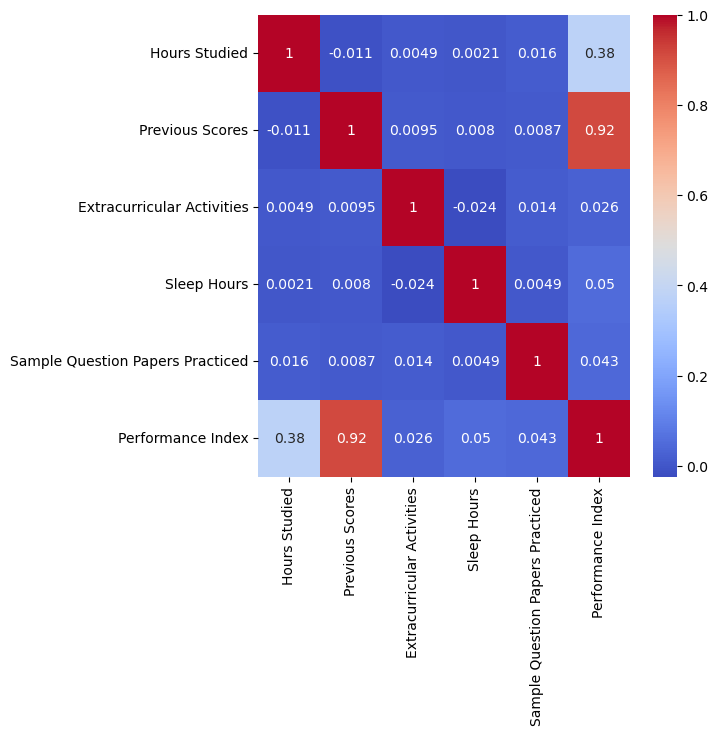

In [24]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [25]:
df["Previous Scores"].corr(df["Performance Index"])

0.9151350792024563

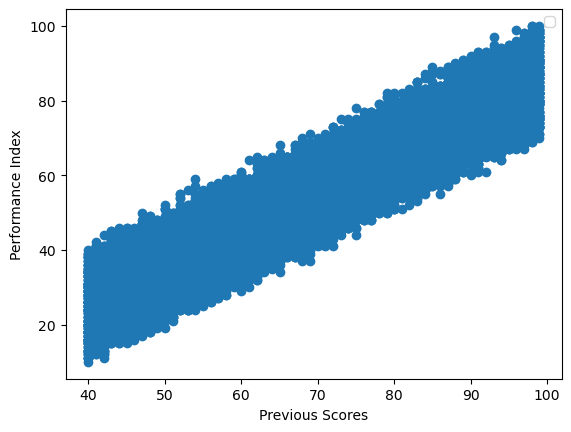

In [26]:
plt.scatter(x=df["Previous Scores"],y=df["Performance Index"])
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.legend()
plt.show()

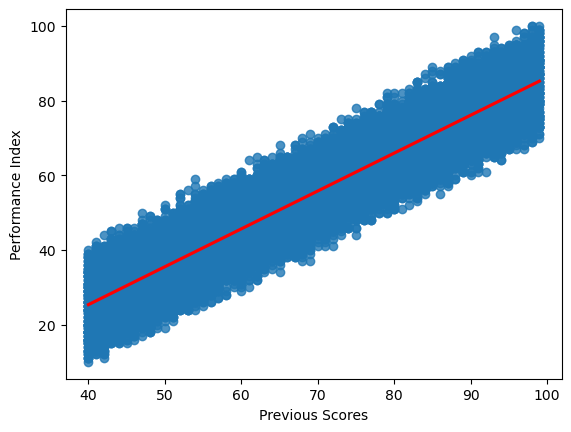

In [27]:
sns.regplot(x=df["Previous Scores"],y=df["Performance Index"],data=df,line_kws={"color": "red"})
plt.show()

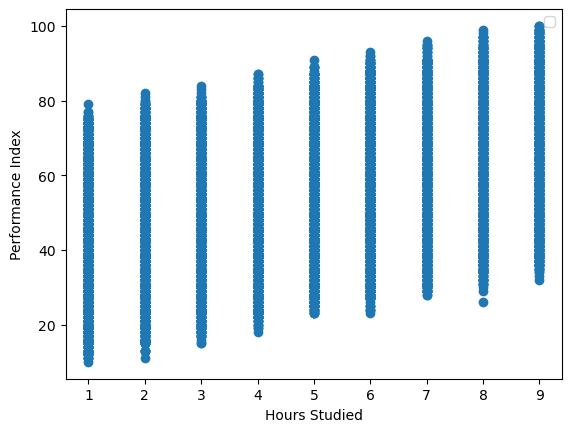

In [28]:
plt.scatter(x=df["Hours Studied"],y=df["Performance Index"])
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.legend()
plt.show()

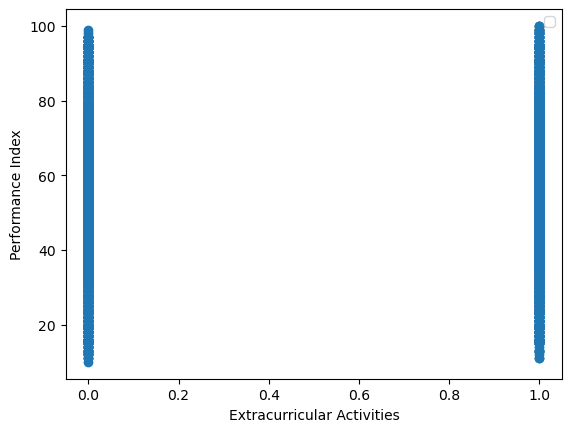

In [29]:
plt.scatter(x=df["Extracurricular Activities"],y=df["Performance Index"])
plt.xlabel("Extracurricular Activities")
plt.ylabel("Performance Index")
plt.legend()
plt.show()

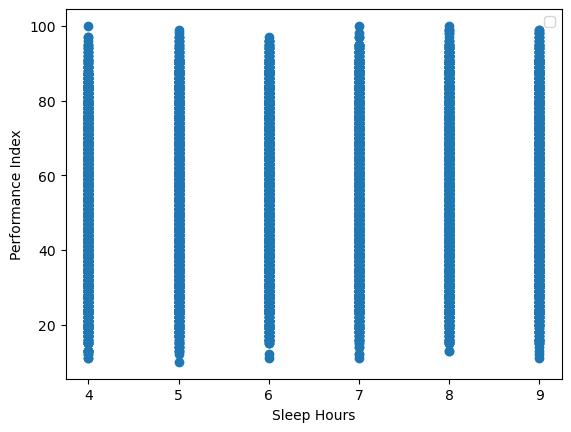

In [30]:
plt.scatter(x=df["Sleep Hours"],y=df["Performance Index"])
plt.xlabel("Sleep Hours")
plt.ylabel("Performance Index")
plt.legend()
plt.show()

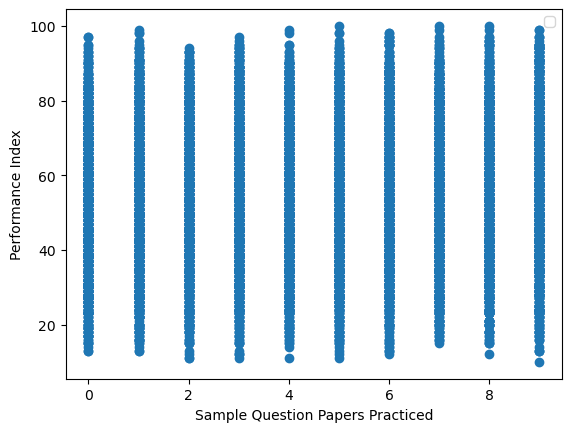

In [31]:
plt.scatter(x=df["Sample Question Papers Practiced"],y=df["Performance Index"])
plt.xlabel("Sample Question Papers Practiced")
plt.ylabel("Performance Index")
plt.legend()
plt.show()

In [32]:
X=df.drop(["Performance Index","Hours Studied","Sleep Hours"],axis=1)
y=df["Performance Index"]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()

In [35]:
lr1.fit(X_train,y_train)

LinearRegression()

In [36]:
lr1.coef_

array([1.01434078, 0.53588659, 0.24580027])

In [37]:
lr1.intercept_

-16.641149432555665

# Prediction On Training Data

In [39]:
y_train_pred=lr1.predict(X_train)
y_train_pred

array([76.67820234, 38.37905296, 44.75518397, ..., 81.73191287,
       31.03286723, 69.79247743])

In [44]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score

In [53]:
root_mean_squared_error(y_train_pred,y_train)

7.695305055886675

In [59]:
mean_absolute_error(y_train_pred,y_train)

6.575218958181229

In [60]:
r2_score(y_train_pred,y_train)

0.8086523228643139

# Predition On Testing data

In [63]:
y_test_pred=lr1.predict(X_test)
y_test_pred

array([50.04154842, 75.43120764, 58.18741438, ..., 58.95595489,
       44.47824399, 40.38974116])

In [64]:
root_mean_squared_error(y_test_pred,y_test)

7.741914925325283

In [65]:
mean_absolute_error(y_test_pred,y_test)

6.657643566945878

In [66]:
r2_score(y_test_pred,y_test)

0.8068040756267043

In [69]:
X=df.drop("Performance Index",axis=1)
y=df["Performance Index"]

In [70]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [71]:
lr2=LinearRegression()

In [73]:
lr2.fit(X_train,y_train)

LinearRegression()

In [74]:
lr2.coef_

array([2.85364318, 1.01801988, 0.57797717, 0.4715297 , 0.19003358])

In [75]:
lr2.intercept_

-33.976894833518074

# Prediction On Training Data

In [77]:
y_train_pred2=lr2.predict(X_train)
y_train_pred2

array([68.68892833, 42.08030891, 41.92602602, ..., 81.07903673,
       20.96744998, 81.94196913])

In [78]:
root_mean_squared_error(y_train_pred2,y_train)

2.0322742798043816

In [79]:
mean_absolute_error(y_train_pred2,y_train)

1.6145283528506449

In [81]:
r2_score(y_train_pred2,y_train)

0.9886710391408091

# Prediction On Testing Data

In [88]:
y_test_pred2=lr2.predict(X_test)
y_test_pred2

array([46.47674371, 80.27452611, 61.05760438, ..., 58.56041781,
       38.62446369, 33.82296889])

In [89]:
root_mean_squared_error(y_test_pred2,y_test)

2.077763201768326

In [90]:
mean_absolute_error(y_test_pred2,y_test)

1.6486334804527567

In [91]:
r2_score(y_test_pred2,y_test)

0.9881507682778695

In [92]:
performance=pd.DataFrame({"Orignial Performance Index":y_test,"Predicted Performance Index":y_test_pred2})
performance

,Orignial Performance Index,Predicted Performance Index
6099,47,46.476744
106,76,80.274526
9265,62,61.057604
4707,23,22.708336
2155,76,74.839441
...,...,...
5571,58,57.657471
8872,63,64.118772
8257,57,58.560418
5677,38,38.624464


In [93]:
def predict_Performance_index():
    hours = float(input("Enter the hours you studied: "))
    previous_score = float(input("Enter your previous score: "))
    extra_activities_input = input("Did you participate in extracurricular activities? (Yes/No): ").strip().lower()
    extra_activities = 1 if extra_activities_input == 'yes' else 0
    sleep_hours = float(input("Enter your average sleeping hours: "))
    sample_paper = float(input("Enter how many sample papers you have practiced: "))


    input_features = [[
        hours,
        previous_score,
        extra_activities,
        sleep_hours,
        sample_paper
    ]]
    
 
    prediction = lr2.predict(input_features)

    print("Our Model Says Your Predicted Performance Index Is: ", round(prediction[0], 2))

In [94]:
predict_Performance_index()

Enter the hours you studied:  8
Enter your previous score:  88
Did you participate in extracurricular activities? (Yes/No):  Yes
Enter your average sleeping hours:  7
Enter how many sample papers you have practiced:  7


Our Model Says Your Predicted Performance Index Is:  83.65


In [95]:
import pickle

In [96]:
with open("model.pkl", "wb") as f:
    pickle.dump(lr2, f)

In [97]:
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)